# Main Scope

1.   Perbandingan Jumlah Vaksinasi Harian di Asean
2.   Prediksi Waktu Vaksinasi total di Wilayah Asean
3.   Rekomendasi Penambahan Jumlah Vaksin untuk Mencapai target Vaksin hingga akhir tahun 2021



In [34]:
  from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [36]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/covid_vaccine_progress

/content/gdrive/MyDrive/Colab Notebooks/covid_vaccine_progress


In [37]:
# !kaggle datasets download -d gpreda/covid-world-vaccination-progress

In [38]:
# !unzip \*.zip  && rm *.zip

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('country_vaccinations.csv')
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [41]:
iso_code = df.iso_code.unique()
iso_code

array(['ALB', 'DZA', 'AND', 'AIA', 'ARG', 'AUS', 'AUT', 'AZE', 'BHR',
       'BGD', 'BRB', 'BLR', 'BEL', 'BMU', 'BOL', 'BRA', 'BGR', 'KHM',
       'CAN', 'CYM', 'CHL', 'CHN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE',
       'DNK', 'DOM', 'ECU', 'EGY', nan, 'EST', 'FRO', 'FLK', 'FIN', 'FRA',
       'DEU', 'GIB', 'GRC', 'GRL', 'GGY', 'GUY', 'HUN', 'ISL', 'IND',
       'IDN', 'IRN', 'IRL', 'IMN', 'ISR', 'ITA', 'JPN', 'JEY', 'KWT',
       'LVA', 'LBN', 'LIE', 'LTU', 'LUX', 'MAC', 'MDV', 'MLT', 'MUS',
       'MEX', 'MCO', 'MAR', 'MMR', 'NPL', 'NLD', 'NZL', 'OWID_NCY', 'NOR',
       'OMN', 'PAK', 'PAN', 'PER', 'POL', 'PRT', 'QAT', 'ROU', 'RUS',
       'SHN', 'SAU', 'SRB', 'SYC', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP',
       'LKA', 'SWE', 'CHE', 'TUR', 'TCA', 'ARE', 'GBR', 'USA'],
      dtype=object)

In [42]:
from IPython.display import display

In [43]:
country_df_list = []
for country in iso_code:
  country_df = df.loc[df.iso_code == country]
  country_df[:1].fillna(0, inplace=True)
  country_df.fillna(method='ffill', inplace=True)
  country_df_list.append(country_df)

filled_df = pd.concat(country_df_list, ignore_index=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [44]:
filled_df.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1831,Israel,ISR,2021-01-03,1292560.0,1292560.0,0.0,150975.0,128908.0,14.93,14.93,0.00,14893.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
3134,Singapore,SGP,2021-02-16,256000.0,250000.0,6000.0,2800.0,12482.0,4.38,4.27,0.10,2134.0,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...
1703,Indonesia,IDN,2021-02-02,648259.0,596260.0,51999.0,73321.0,57511.0,0.24,0.22,0.02,210.0,Sinovac,Ministry of Health,https://www.kemkes.go.id/
744,Chile,CHL,2021-02-11,1655694.0,1600624.0,55070.0,252432.0,175668.0,8.66,8.37,0.29,9189.0,"Pfizer/BioNTech, Sinovac",Department of Statistics and Health Information,https://www.gob.cl/yomevacuno/
1752,Ireland,IRL,2021-01-20,121900.0,0.0,0.0,0.0,6371.0,2.47,0.00,0.00,1290.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/


In [45]:
# filled_df.head()
df = filled_df

In [46]:
sea_iso = ['IDN', 'KHM', 'MMR', 'SGP']
sea_df_list = []
for country in sea_iso:
  country_df = df.loc[df.iso_code == country]
  sea_df_list.append(country_df)
  # display(country_df.head(2))

sea_df = pd.concat(sea_df_list, ignore_index=True)
sea_df.sample(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Singapore,SGP,2021-02-15,256000.0,250000.0,6000.0,2800.0,11964.0,4.38,4.27,0.10,2045.0,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...
46,Cambodia,KHM,2021-02-15,1492.0,1492.0,0.0,1492.0,456.0,0.01,0.01,0.00,27.0,Sinopharm/Beijing,Ministry of Health,https://www.facebook.com/MinistryofHealthofCam...
70,Singapore,SGP,2021-01-22,60000.0,60000.0,0.0,2800.0,5380.0,1.03,1.03,0.00,920.0,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...
12,Indonesia,IDN,2021-01-24,149242.0,0.0,0.0,0.0,11892.0,0.05,0.00,0.00,43.0,Sinovac,Ministry of Health,https://www.kemkes.go.id/
2,Indonesia,IDN,2021-01-14,0.0,0.0,0.0,0.0,13200.0,0.00,0.00,0.00,48.0,Sinovac,Ministry of Health,https://www.kemkes.go.id/
50,Cambodia,KHM,2021-02-19,4609.0,4609.0,0.0,1492.0,374.0,0.03,0.03,0.00,22.0,Sinopharm/Beijing,Ministry of Health,https://www.facebook.com/MinistryofHealthofCam...
96,Singapore,SGP,2021-02-17,256000.0,250000.0,6000.0,2800.0,13000.0,4.38,4.27,0.10,2222.0,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...
69,Singapore,SGP,2021-01-21,6200.0,6200.0,0.0,2800.0,5380.0,0.11,0.11,0.00,920.0,Pfizer/BioNTech,Ministry of Health,https://www.moh.gov.sg/news-highlights/details...
0,Indonesia,IDN,2021-01-12,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,Sinovac,Ministry of Health,https://www.kemkes.go.id/
26,Indonesia,IDN,2021-02-07,923449.0,784318.0,139131.0,9146.0,58253.0,0.34,0.29,0.05,213.0,Sinovac,Ministry of Health,https://www.kemkes.go.id/


In [47]:
sea_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,9.800000e+01,9.800000e+01,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,3.369776e+05,2.555946e+05,68578.581633,20235.091837,22304.918367,0.977959,0.910612,0.060000,659.989796
std,5.141044e+05,3.698672e+05,162657.459707,35397.970050,25454.537829,1.482401,1.404142,0.196694,730.630169
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.800000e+03,3.730000e+02,0.000000,1492.000000,5380.000000,0.012500,0.002500,0.000000,49.000000
50%,1.225250e+05,6.000000e+04,0.000000,2800.000000,11334.500000,0.190000,0.180000,0.000000,254.000000
75%,3.470008e+05,2.500000e+05,6000.000000,12723.750000,27160.750000,1.030000,1.030000,0.100000,1271.000000
max,1.956725e+06,1.224091e+06,732634.000000,181937.000000,84695.000000,6.150000,4.270000,1.880000,2222.000000


In [48]:
vaccination_date = sea_df.date.unique()

In [ ]:
total_vaccinations = pd.pivot_table(sea_df, values='total_vaccinations', index='date', columns='iso_code', fill_value=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


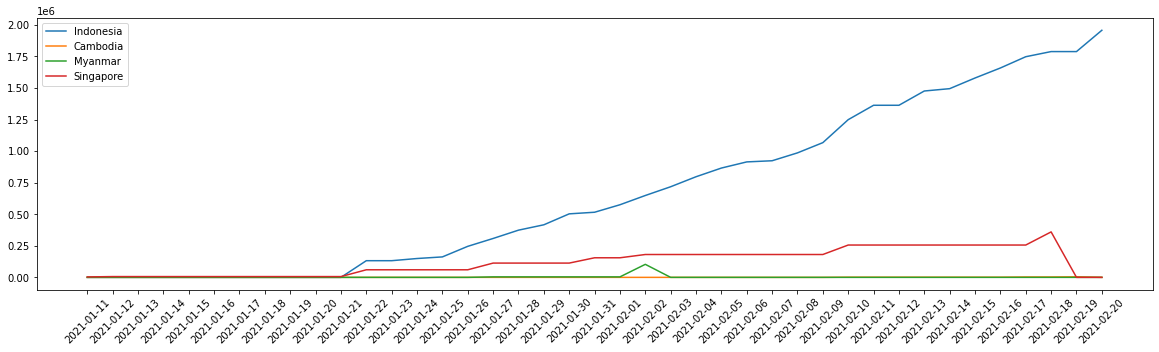

In [57]:
idn = total_vaccinations["IDN"]
khm = total_vaccinations["KHM"]
mmr = total_vaccinations["MMR"]
sgp = total_vaccinations["SGP"]

x = total_vaccinations.index

plt.figure(figsize=(20,5))
plt.plot(x, idn, label="Indonesia")
plt.plot(x, khm, label="Cambodia")
plt.plot(x, mmr, label="Myanmar")
plt.plot(x, sgp, label="Singapore")
plt.xticks(rotation=45)
plt.legend(loc="top left")
plt.show()

In [ ]:
df.date.min()

In [ ]:
# idn_df = df.loc[df.iso_code == 'IDN']

In [ ]:
# idn_df.iloc[0].fillna(value=0, inplace=True)

In [ ]:
# idn_df.fillna(method='ffill', inplace=True)

In [ ]:
# idn_df[:1]
# # idn_df.loc[idn_df.date <= '2021-02-13']
# # idn_df.head()

In [ ]:
# plt.figure(figsize=(20,5))
# plt.plot(idn_df.date, idn_df.total_vaccinations)
# plt.xlabel('Date')
# plt.xticks(rotation=45)
# plt.ylim(idn_df.total_vaccinations.min(), idn_df.total_vaccinations.max())
# plt.grid()
# plt.show()